<a href="https://colab.research.google.com/github/Mukul-Quantum-Researcher/QOSF-Cohort-10/blob/main/QOSF_Cohort_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Restart the runtime after installing
!pip install pylatexenc
!pip install qiskit
!pip install qiskit_aer

# **Problem Statement:**  
Consider the following code as input  



In [3]:
import numpy as np
size = 5
state_values = [22,17,27,12]
state_vector = [0]*2**size
for s in state_values:
   print(np.binary_repr(s,size))
   state_vector[s] = 0.5
np.asarray(state_vector)


10110
10001
11011
01100


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
       0. , 0.5, 0. , 0. , 0. , 0. ])

Find a quantum circuit that represents the state vector with a depth less than 50, using the
 basis_gates=[x,h,rz,cx] and the following architecture.

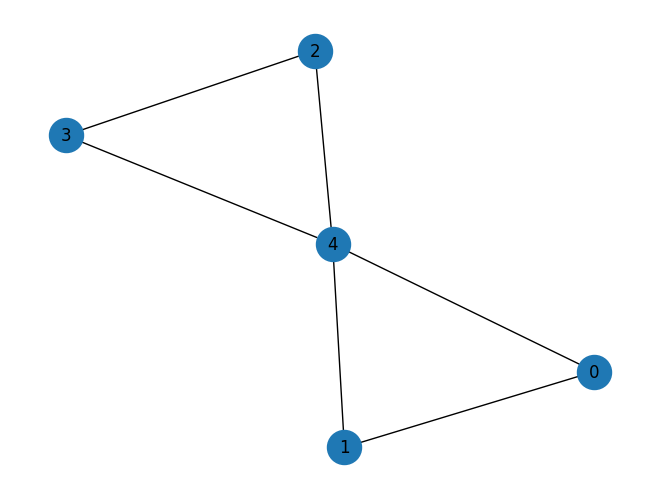

In [29]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

n = 5 #number of nodes

graph = rx.PyGraph()  #define a graph as a "rustworks graph" object
graph.add_nodes_from(np.arange(0, n, 1)) #add nodes in the graph

#define edge list which defines the edges between nodes and the weight of each edge
edge_list = [(0, 1, 1.0), (0, 4, 1.0), (1, 4, 1.0), (2, 3, 1.0), (4,2,1.0), (4,3,1.0)]
graph.add_edges_from(edge_list)  #add the edge list to our graph
draw_graph(graph, node_size=600, with_labels=True) #draw the graph

# **Solution**:
To get the statevector $|Ψ⟩ = \frac12\pmatrix{|01100⟩ + |10001⟩ + |10110⟩ + |11011⟩ }$  

* We initialize the circuit in $|0⟩^{⊗5}$.
* Add hadamard gates to qubit 0 and 1 to get a superposition $|Ψ⟩ = \frac12\pmatrix{|00000⟩ + |00001⟩ + |00010⟩ + |00011⟩ }$  
* Use X, CNot and RZ gates to manipulate this superposition of these 4 states to result in desired Statevector.  

**Constraint:**
* Circuit depth should be less than 50.
* Allowed Gates for the hardware : H,X,RZ,CX
* Circuit should be optimized for architecture (CX should be applied only between connected qubits)

# Quantum Circuit

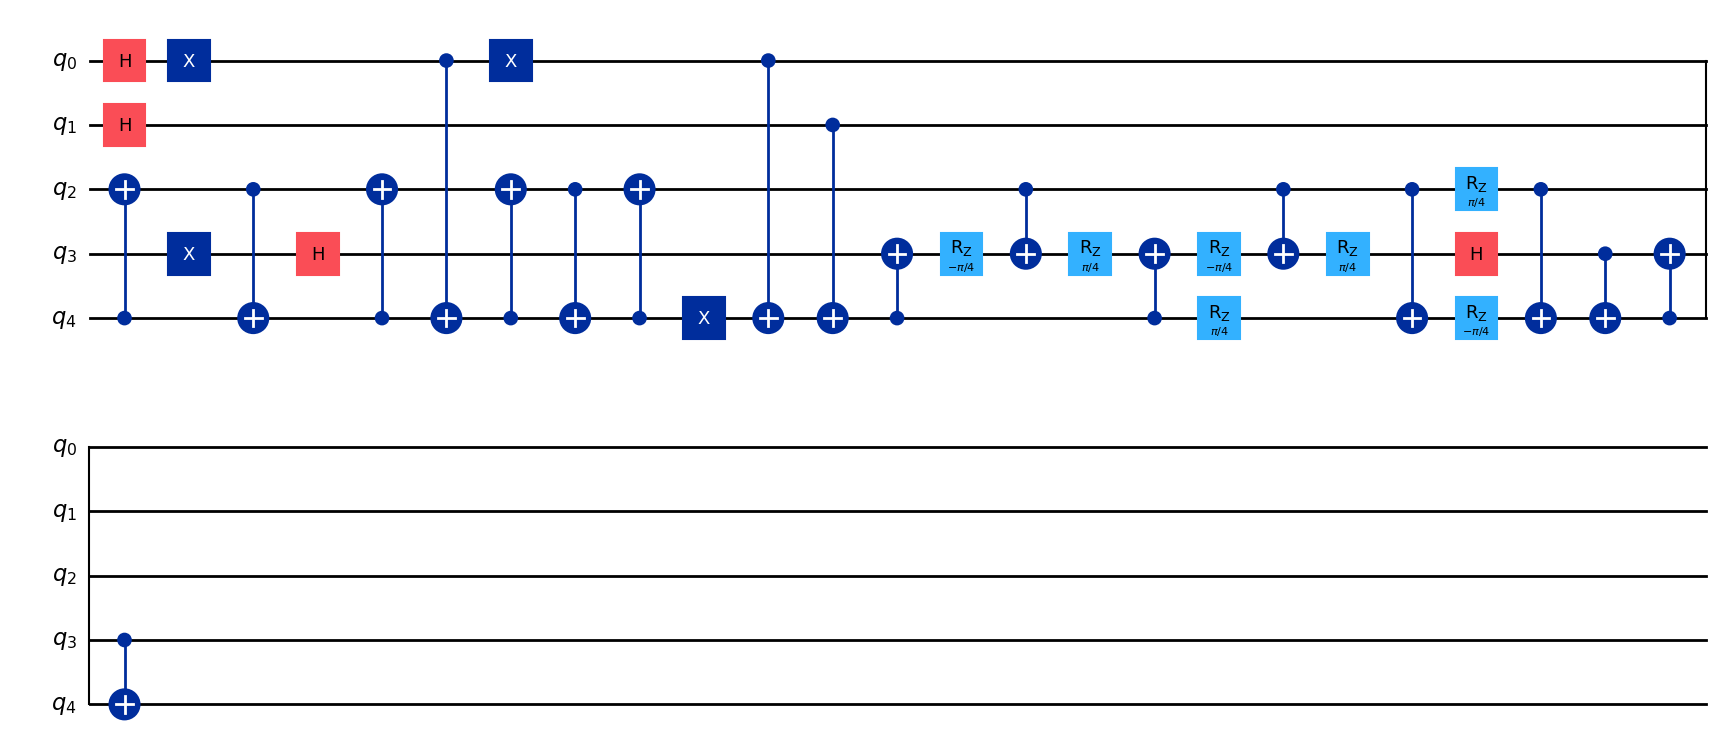

In [34]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, array_to_latex
import numpy as np

qc = QuantumCircuit(5)

#apply hadamard
qc.h(0)
qc.h(1)

# Manipulate the superposition to get desired Statevector
qc.x(0)
# to apply Cx between 0 and 2
#swap(4,2)
qc.cx(4,2)
qc.cx(2,4)
qc.cx(4,2)
# apply CX
qc.cx(0, 4)
# swap(4,2) back
qc.cx(4,2)
qc.cx(2,4)
qc.cx(4,2)
qc.x(0)

qc.x(4)
qc.x(3)

qc.cx(0, 4)
qc.cx(1, 4)

qc.h(3)
qc.cx(4, 3)
qc.rz(-np.pi/4, 3)
qc.cx(2, 3)
qc.rz(np.pi/4,3)
qc.cx(4, 3)
qc.rz(-np.pi/4, 3)
qc.cx(2, 3)
qc.rz(np.pi/4,4)
qc.rz(np.pi/4,3)
qc.cx(2, 4)
qc.h(3)
qc.rz(np.pi/4,2)
qc.rz(-np.pi/4, 4)
qc.cx(2, 4)

# swap(3,4)
qc.cx(3,4)
qc.cx(4,3)
qc.cx(3,4)

qc.draw('mpl')

This circuit prepares the desired statevector upto a global phase, with circuit depth 23.

In [35]:
print(qc.depth())
Statevector(qc).draw('latex')

23


<IPython.core.display.Latex object>

# Let's try to simulate this circuit using AerSimulator

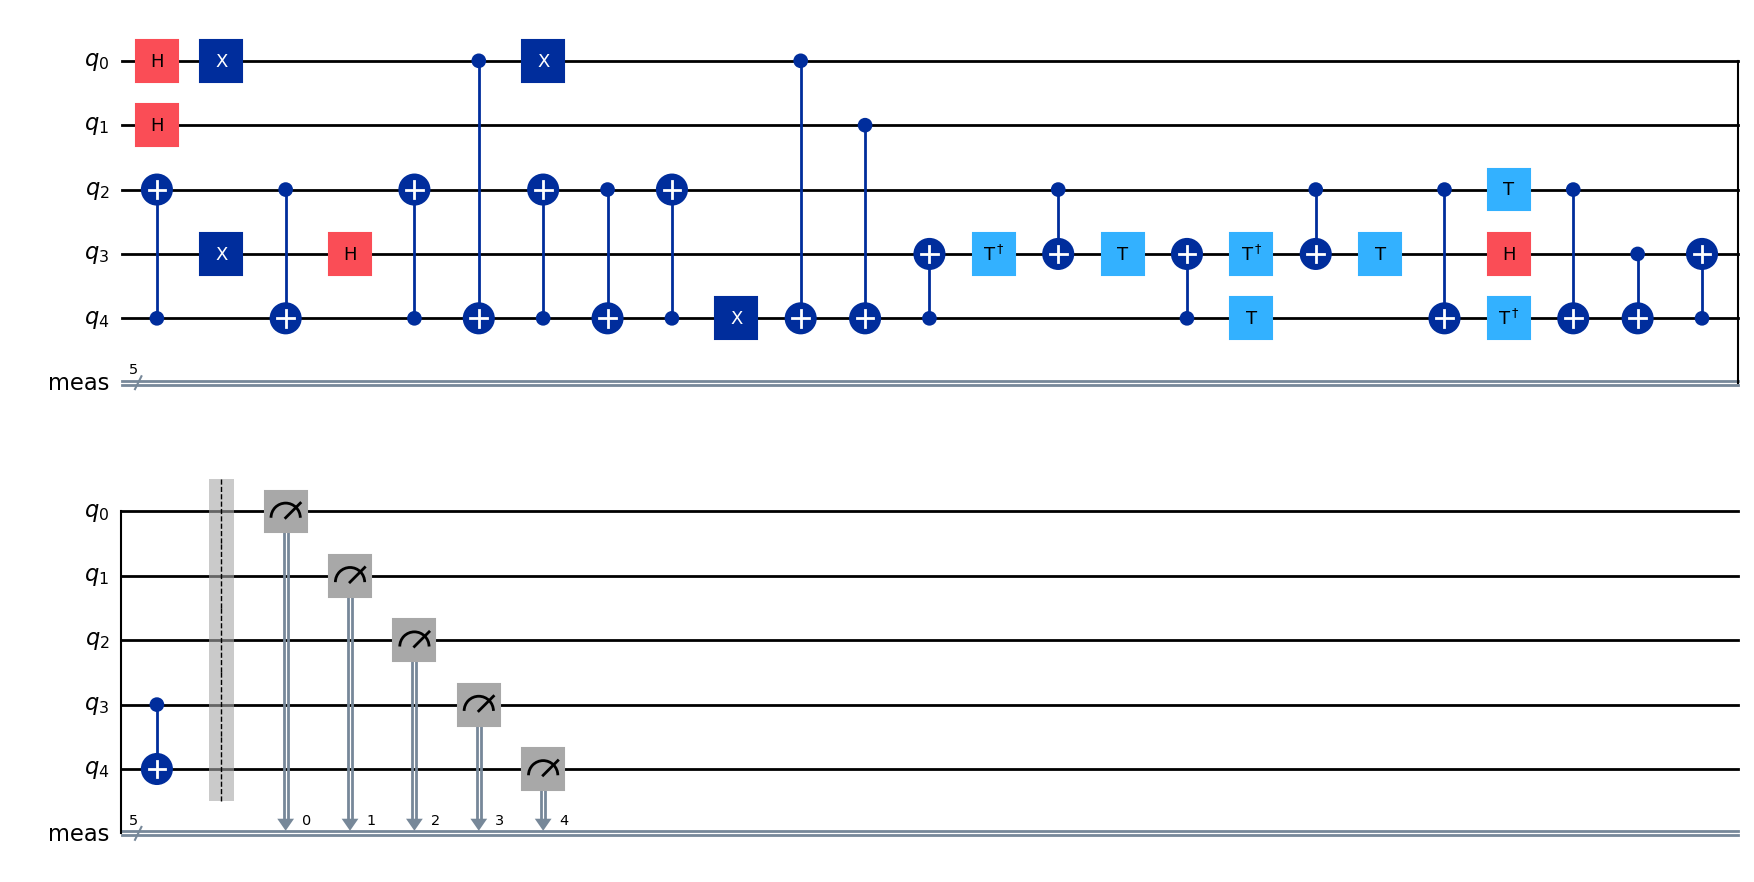

In [21]:
qc.measure_all()
qc.draw('mpl')

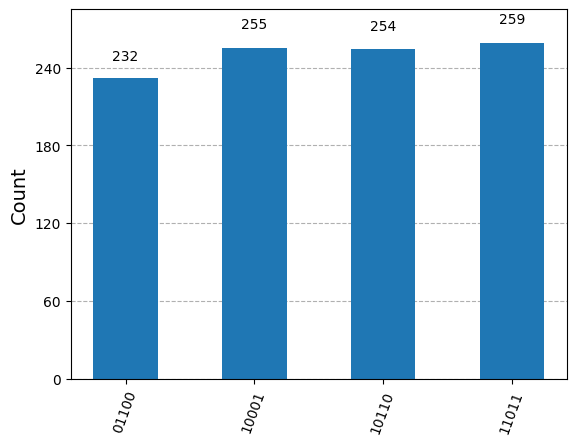

In [23]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a simulator
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)